In [44]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [45]:
df=pd.read_csv(r'C:\Users\aksha\Downloads\Machine Learning Internship  MIP-ML-17-20240912T051533Z-001\Machine Learning Internship  MIP-ML-17\Task 3 Brain Stroke prediction\healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [46]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [47]:
df=df.dropna(subset=['bmi'])

In [48]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [49]:
df.shape

(4909, 12)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [51]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [52]:
df.nunique()

id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [53]:
data_cat = df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                 'smoking_status', 'stroke']]

In [54]:
for i in data_cat.columns:
    print(data_cat[i].unique())

['Male' 'Female' 'Other']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


In [55]:
for i in data_cat.columns:
    print(data_cat[i].value_counts())

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64
hypertension
0    4458
1     451
Name: count, dtype: int64
heart_disease
0    4666
1     243
Name: count, dtype: int64
ever_married
Yes    3204
No     1705
Name: count, dtype: int64
work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2490
Rural    2419
Name: count, dtype: int64
smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64
stroke
0    4700
1     209
Name: count, dtype: int64


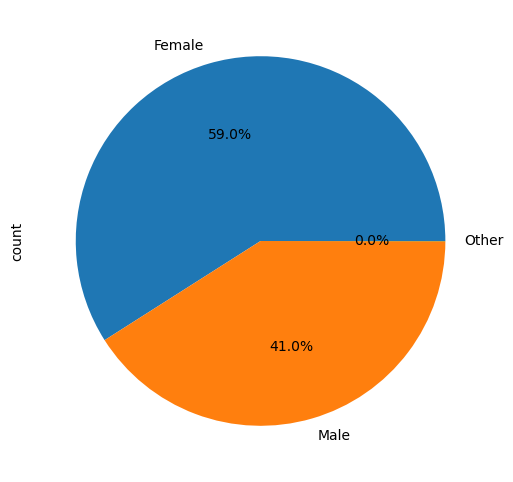

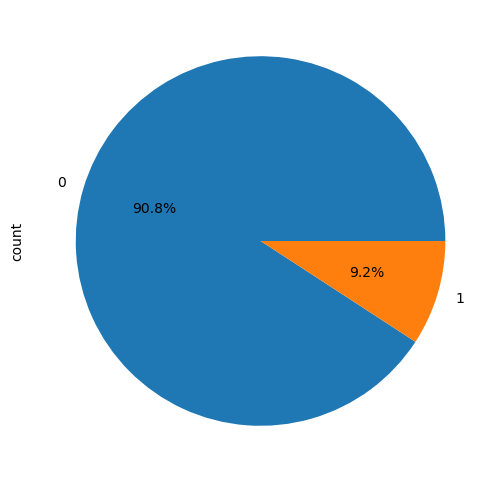

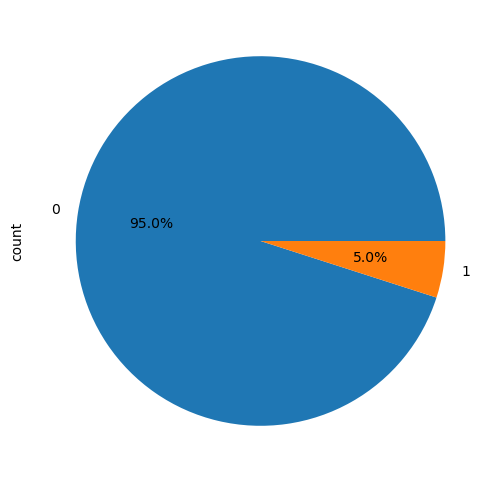

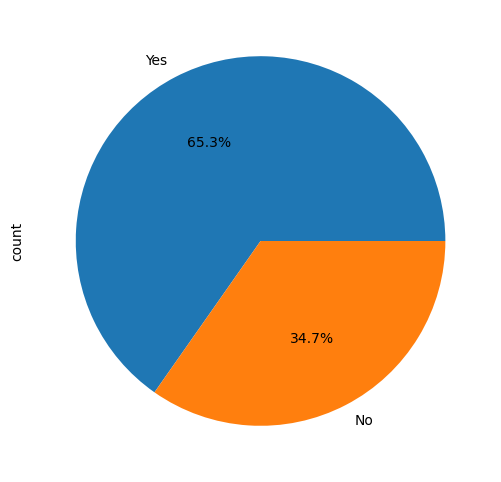

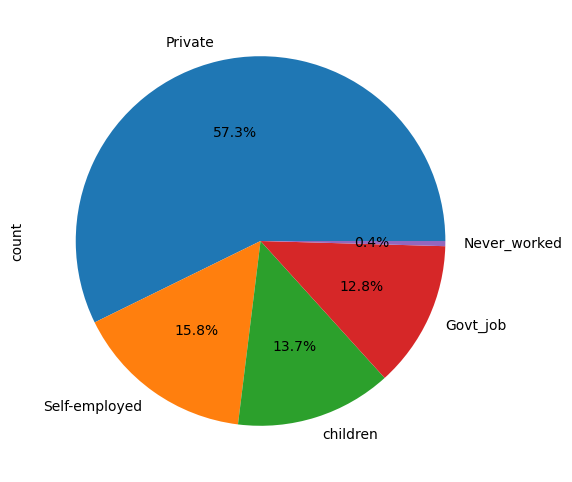

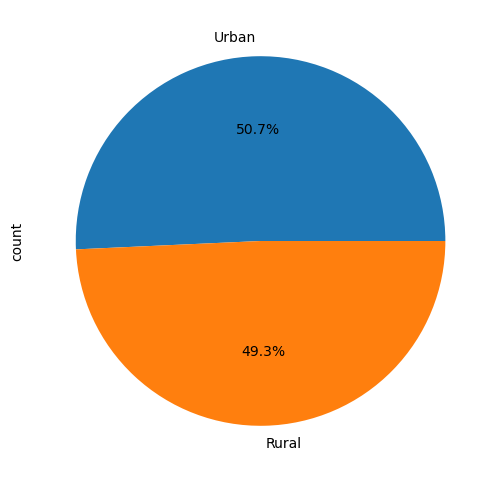

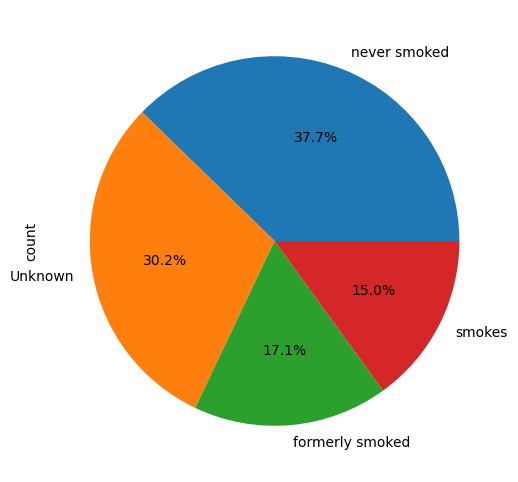

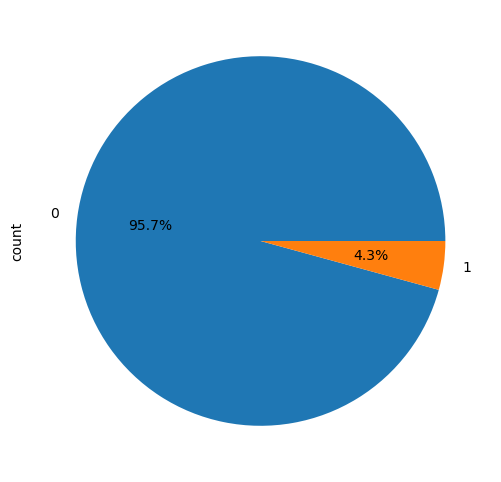

In [56]:
for i in data_cat.columns:
    plt.figure(figsize = (15,6))
    data_cat[i].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
    plt.xticks(rotation = 90)
    plt.show()

In [57]:
df['ever_married'] = [ 0 if i !='Yes' else 1 for i in df['ever_married'] ]
df['gender'] = [0 if i != 'Female' else 1 for i in df['gender']]

In [58]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,13.0,0,0,0,children,Rural,103.08,18.6,Unknown,0
5106,44873,1,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,1,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,0,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [59]:
df = pd.get_dummies(df, columns = ['work_type', 'Residence_type','smoking_status'],dtype=int)

In [60]:
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2847,2393,0,59.0,1,0,1,87.81,29.8,0,0,0,1,0,0,1,0,0,1,0,0
2314,24289,0,82.0,0,0,1,89.83,24.7,0,0,0,1,0,0,0,1,0,0,0,1
4256,41481,1,5.0,0,0,0,64.45,21.7,0,0,0,0,0,1,1,0,1,0,0,0
2202,65419,0,73.0,0,1,1,70.23,28.1,0,1,0,0,0,0,1,0,0,0,1,0
835,68281,1,54.0,0,0,1,74.23,28.1,0,1,0,0,0,0,0,1,0,1,0,0
592,31988,1,56.0,0,0,1,100.83,26.8,0,0,0,1,0,0,0,1,0,0,1,0
1878,27479,0,63.0,0,0,1,104.70,21.0,0,0,0,0,1,0,1,0,0,1,0,0
4671,15387,0,19.0,0,0,0,79.60,36.7,0,0,0,1,0,0,1,0,1,0,0,0
1938,13503,0,81.0,0,0,1,83.52,25.0,0,0,0,0,1,0,0,1,0,0,1,0
2973,14928,1,26.0,0,0,0,81.94,26.0,0,0,0,1,0,0,0,1,0,0,0,1


In [61]:
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split

In [63]:
X=df.drop(['stroke'],axis=1)
X

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0,67.0,0,1,1,228.69,36.6,0,0,1,0,0,0,1,0,1,0,0
2,31112,0,80.0,0,1,1,105.92,32.5,0,0,1,0,0,1,0,0,0,1,0
3,60182,1,49.0,0,0,1,171.23,34.4,0,0,1,0,0,0,1,0,0,0,1
4,1665,1,79.0,1,0,1,174.12,24.0,0,0,0,1,0,1,0,0,0,1,0
5,56669,0,81.0,0,0,1,186.21,29.0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,13.0,0,0,0,103.08,18.6,0,0,0,0,1,1,0,1,0,0,0
5106,44873,1,81.0,0,0,1,125.20,40.0,0,0,0,1,0,0,1,0,0,1,0
5107,19723,1,35.0,0,0,1,82.99,30.6,0,0,0,1,0,1,0,0,0,1,0
5108,37544,0,51.0,0,0,1,166.29,25.6,0,0,1,0,0,1,0,0,1,0,0


In [65]:
y=df['stroke']
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

In [67]:
df.shape

(4909, 20)

In [66]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((3289, 19), (1620, 19))

In [69]:
lr= LogisticRegression(random_state=0)  
lr.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [70]:
y_pred= lr.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
cm

array([[1539,    1],
       [  80,    0]], dtype=int64)

In [73]:
print('Training-set accuracy score:', lr.score(X_train, y_train))

Training-set accuracy score: 0.9610823958650045


In [81]:
print('Testing-set accuracy score:', lr.score(X_test, y_test))

Testing-set accuracy score: 0.95


In [74]:
classifier_dt = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth= 5)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [76]:
y_pred= classifier_dt.predict(X_test)

In [78]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[1523,   17],
       [  78,    2]], dtype=int64)

In [79]:
print('Training-set accuracy score:', classifier_dt.score(X_train, y_train))

Training-set accuracy score: 0.9656430525995744


In [87]:
print('Testing-set accuracy score:', classifier_dt.score(X_test, y_test))

Testing-set accuracy score: 0.941358024691358


In [82]:
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier_rf.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [83]:
y_pred= classifier_rf.predict(X_test)

In [84]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[1540,    0],
       [  80,    0]], dtype=int64)

In [85]:
print('Training-set accuracy score:', classifier_rf.score(X_train, y_train))

Training-set accuracy score: 0.9902705989662511


In [86]:
print('Training-set accuracy score:', classifier_rf.score(X_test, y_test))

Training-set accuracy score: 0.9506172839506173


Random Forest and Logistic Regression are giving the accuracy of 95% , so we will choose this model and go for it  